# Project Definition

The goal of this project is to predict the classification of three different types of flowers (setosa, versicolor, and virginica) using the famous iris flower data set. 

We'll be using a Support Vector Classifier to classify the flowers.

# Initiation

In [1]:
#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#machine learning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
iris = sns.load_dataset('iris')

# Exploratory Data Analysis

Support Vector Machines rely heavily on the separation between the labels' data, so we'll use a pair plot to see how mixed our data is.

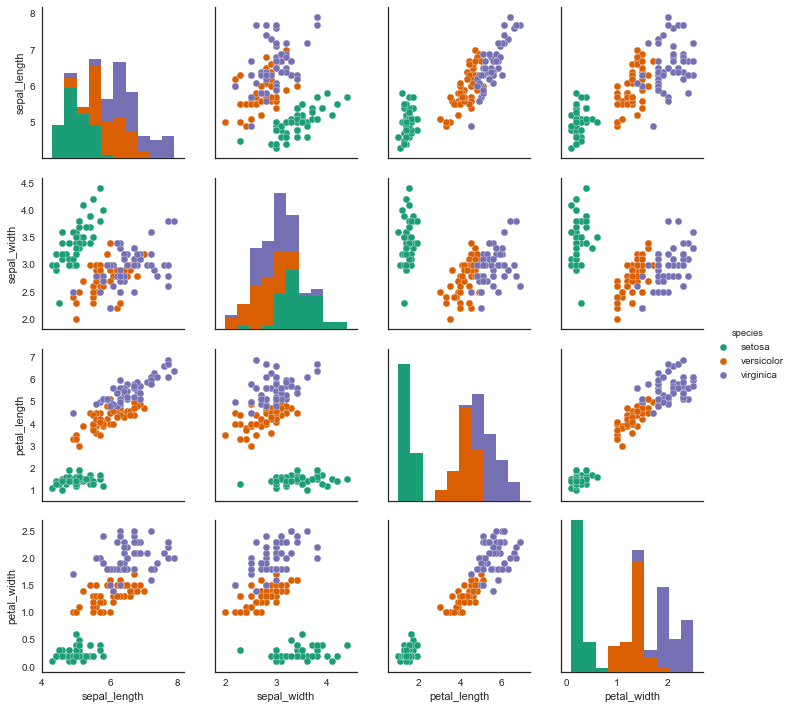

In [3]:
# Setosa is the most separable. 
sns.pairplot(iris,hue='species',palette='Dark2')

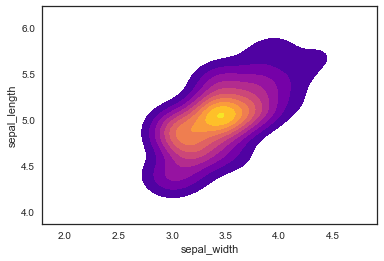

In [4]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Training a SVC

In [7]:
#define features and labels
X = iris.drop('species',axis=1)
y = iris['species']

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#create instance of SVC
svc_model = SVC()

#fit model to training data
svc_model.fit(X_train,y_train)

#make predictions off x test set
predictions = svc_model.predict(X_test)

In [8]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[12  0  0]
 [ 0 18  0]
 [ 0  0 15]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      1.00      1.00        18
  virginica       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        45



Our model ended up being perfect at predicting which flower is which. This is an extreme case and only happens rarely without algorithm optimization. It turned out so well because we have such a small data set.

Even though we don't need to fine tune our algorithm, let's use GridSearch for practice. GridSearch is used to find the optimal parameters to pass the SVC out of the list that we pass in.

## GridSearch Practice

In [9]:
#dictionary of parameters to pass in to grid search
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

#pass in estimator (SVC), parameter dictionary, and how verbose we want our output
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

#gridsearch object will behave like our estimator, so we fit it to our data
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [10]:
grid_predictions = grid.predict(X_test)

#with updated parameters
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[12  0  0]
 [ 0 18  0]
 [ 0  0 15]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      1.00      1.00        18
  virginica       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        45

